# Libraries import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# %matplotlib inline
plt.style.use("ggplot")
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Dataset Loading

In [2]:
product_descriptions = pd.read_csv('amazon.csv')
product_descriptions.shape

(1545, 16)

In [3]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head(50)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_402

# Product Description

In [4]:
product_descriptions1 = product_descriptions.head(100)
# product_descriptions1.iloc[:,1]

product_descriptions1["about_product"].head(10)

0    High Compatibility : Compatible With iPhone 12...
1    Compatible with all Type C enabled devices, be...
2    【 Fast Charger& Data Sync】-With built-in safet...
3    The boAt Deuce USB 300 2 in 1 cable is compati...
4    [CHARGE & SYNC FUNCTION]- This cable comes wit...
5    Fast Charging & Data Sync: Solero TB301 Type-C...
6    It Ensures High Speed Transmission And Chargin...
7    1m long Type-C USB Cable|Sturdy and Durable. W...
8    USB WiFi Adapter —— Speedy wireless transmissi...
9    Universal Compatibility – It is compatible wit...
Name: about_product, dtype: object

# TF-IDF

In [5]:
import re

# Custom tokenizer function
def custom_tokenizer(text):
    # Split text into individual words
    tokens = text.lower().split()
    # Remove specific characters from tokens
    tokens = [re.sub(r'[&:\-——|/;\[\]–]', '', token) for token in tokens if re.sub(r'[&:\-——|/;\[\]–]', '', token)]
    return tokens

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["about_product"])
X1_csr = csr_matrix(X1)  # Convert to Compressed Sparse Row (CSR) format

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Cluster Visualization

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


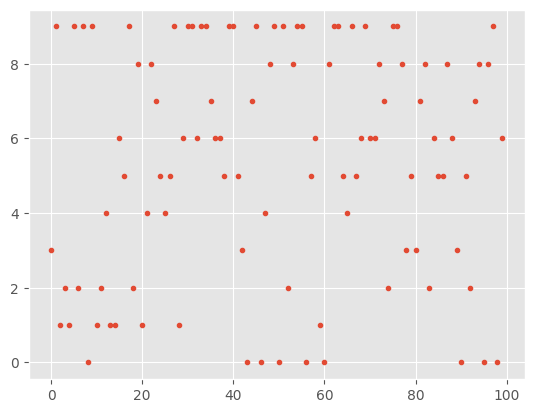

In [6]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


# Model

In [7]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

KMeans(max_iter=100, n_clusters=10, n_init=1)

# Clusters based on Product Description

In [31]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 wireless
 wifi
 design
 usb
 supports
 related
 issue
 band
 mac
 os
Cluster 1:
 cable
 charging
 usb
 material
 data
 sync
 comfort
 devices
 fast
 charge
Cluster 2:
 cable
 micro
 usb
 long
 like
 rugged
 outer
 length
 android
 charging
Cluster 3:
 plus,iphone
 nylon
 sync
 chargedata
 station
 adaptor,
 iphone
 charging
 multiport
 protective
Cluster 4:
 tv
 remote
 led
 connect
 smart
 mi
 panel
 apps
 ports
 stick
Cluster 5:
 typec
 enabled
 usb
 2.0
 connector
 photos
 data,
 standard
 devices,
 powering
Cluster 6:
 connect
 1
 ports
 2
 product
 tv
 features
 year
 panel
 dolby
Cluster 7:
 c
 cable
 type
 usb
 charge
 3.0
 charging
 fast
 data
 pro
Cluster 8:
 10,000+
 test
 flawlessly
 stable
 unplugging
 work
 plugging
 braiding
 bend
 tough
Cluster 9:
 xbox
 tv,
 male
 hdmi
 video
 bandwidth
 display
 ps4,
 channel
 3d,


# Prediction

In [34]:
# As product ids are avaiable in the dataset
product_ids = product_descriptions['product_id']
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    cluster_label = prediction[0]

    print(f"Cluster ID: {cluster_label}")
    cluster_product_ids = [product_ids[j] for j in range(X1_csr.shape[0]) if model.labels_[j] == cluster_label]
    cluster_product_names = [product_descriptions.loc[product_descriptions['product_id'] == product_id, 'product_name'].values[0] for product_id in cluster_product_ids]

    print("Product Names:")
    for product_name in cluster_product_names:
        print(product_name)


# Description of Recommended Products

In [39]:
show_recommendations('OnePlus 80 cm (32 inches) Y Series HD Ready LED Smart Android TV 32Y1 (Black)')

Cluster ID: 4
Product Names:
MI 80 cm (32 inches) 5A Series HD Ready Smart Android LED TV L32M7-5AIN (Black)
Mi 108 cm (43 inches) Full HD Android LED TV 4C | L43M6-INC (Black)
7SEVEN® Compatible for Samsung Smart 4K Ultra HD TV Monitor Remote Control Replacement of Original Samsung TV Remote for LED OLED UHD QLED and Suitable for 6 7 8 Series Samsung TV with Hot Keys BN59-01259E
Redmi 80 cm (32 inches) Android 11 Series HD Ready Smart LED TV | L32M6-RA/L32M7-RA (Black)
Model-P4 6 Way Swivel Tilt Wall Mount 32-55-inch Full Motion Cantilever for LED,LCD and Plasma TV's
Redmi 108 cm (43 inches) 4K Ultra HD Android Smart LED TV X43 | L43R7-7AIN (Black)
TCL 80 cm (32 inches) HD Ready Certified Android Smart LED TV 32S5205 (Black)
Firestick Remote
LOHAYA Remote Compatible for Mi Smart LED TV 4A Remote Control (32"/43") [ Compatible for Mi Tv Remote Control ] [ Compatible for Mi Smart LED Tv Remote Control ]


In [40]:
show_recommendations('cable')

Cluster ID: 1
Product Names:
boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)
Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)
pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)
boAt Micro USB 55 Tangle-free, Sturdy Micro USB Cable with 3A Fast Charging & 480mbps Data Transmission (Black)
Portronics Konnect L POR-1081 Fast Charging 3A Type-C Cable 1.2Meter with Charge & Sync Function for All Type-C Devices (Grey)
Portronics Konnect L 1.2M POR-1401 Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function (White)
Ambrane Unbreakable 3 in 1 Fast Charging Braided Multipurpose Cable for Speaker with 2.1 A Speed - 1.25 meter, Black
pTron 

In [41]:
show_recommendations('adapter')

Cluster ID: 0
Product Names:
TP-Link USB WiFi Adapter for PC(TL-WN725N), N150 Wireless Network Adapter for Desktop - Nano Size WiFi Dongle Compatible with Windows 11/10/7/8/8.1/XP/ Mac OS 10.9-10.15 Linux Kernel 2.6.18-4.4.3
TP-Link Nano AC600 USB Wi-Fi Adapter(Archer T2U Nano)- 2.4G/5G Dual Band Wireless Network Adapter for PC Desktop Laptop, Mini Travel Size, Supports Windows 11,10, 8.1, 8, 7, XP/Mac OS 10.9-10.15
D-Link DWA-131 300 Mbps Wireless Nano USB Adapter (Black)
TP-Link AC600 600 Mbps WiFi Wireless Network USB Adapter for Desktop PC with 2.4GHz/5GHz High Gain Dual Band 5dBi Antenna Wi-Fi, Supports Windows 11/10/8.1/8/7/XP, Mac OS 10.15 and earlier (Archer T2U Plus)
TP-LINK WiFi Dongle 300 Mbps Mini Wireless Network USB Wi-Fi Adapter for PC Desktop Laptop(Supports Windows 11/10/8.1/8/7/XP, Mac OS 10.9-10.15 and Linux, WPS, Soft AP Mode, USB 2.0) (TL-WN823N),Black
Airtel DigitalTV DTH Television, Setup Box Remote Compatible for SD and HD Recording (Black)
Lapster 1.5 mtr USB 2

In [44]:
show_recommendations('xbox')

Cluster ID: 9
Product Names:
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot
Tizum High Speed HDMI Cable with Ethernet | Supports 3D 4K | for All HDMI Devices Laptop Computer Gaming Console TV Set Top Box (1.5 Meter/ 5 Feet)
AmazonBasics USB 2.0 - A-Male to A-Female Extension Cable for Personal Computer, Printer (Black, 9.8 Feet/3 Meters)
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black
